In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Analysis

In [2]:
df = pd.read_csv("ingredient.csv")
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [3]:
# check the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [4]:
# check if there is any nans values
df.isna().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

In [5]:
#show the descriptive statistics of evry columns
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


## Summary
- There are no missing values in the datasets
- Not much difference between mean and median from all columns
- The variance/std from each column has no much difference except c and g which has standard deviation greater than 1


# Correlation

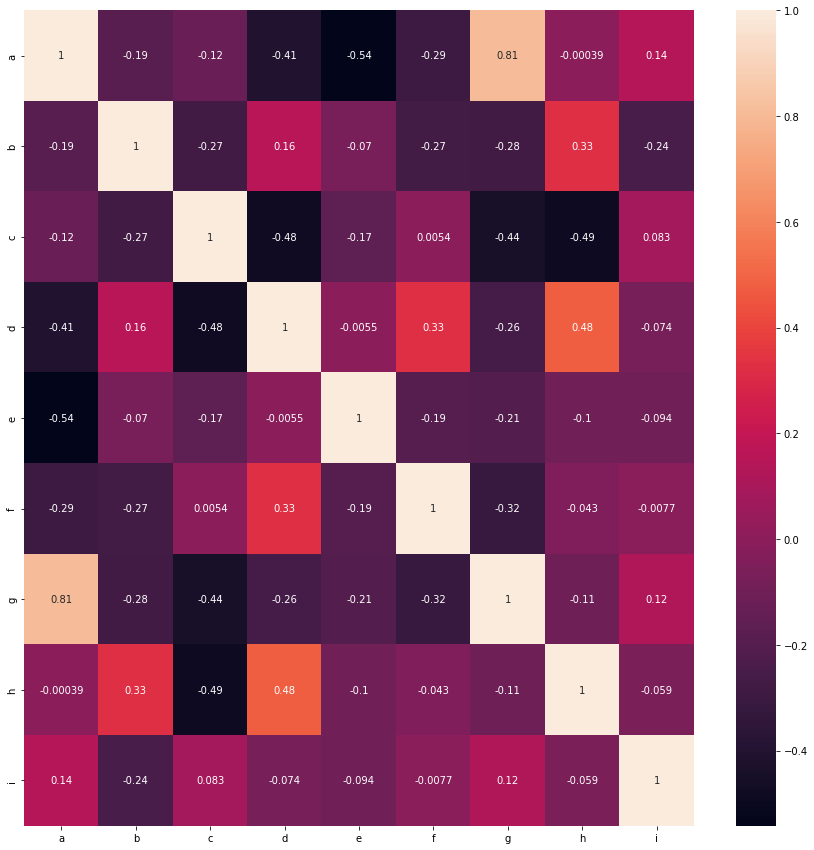

In [6]:
plt.figure(figsize = (15,15))
ax = sns.heatmap(df.corr(), annot=True)

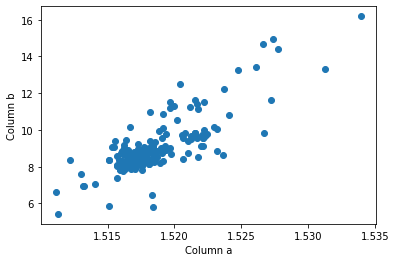

In [7]:
plt.scatter(df['a'],df['g'])
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.show()

## Summary
- Column a and g are positively correlated to each other
- When a increases, g increases as well

# Distribution of each columns

/tmp/ipykernel_39008/3033280928.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


Text(0.04, 0.5, 'Count')

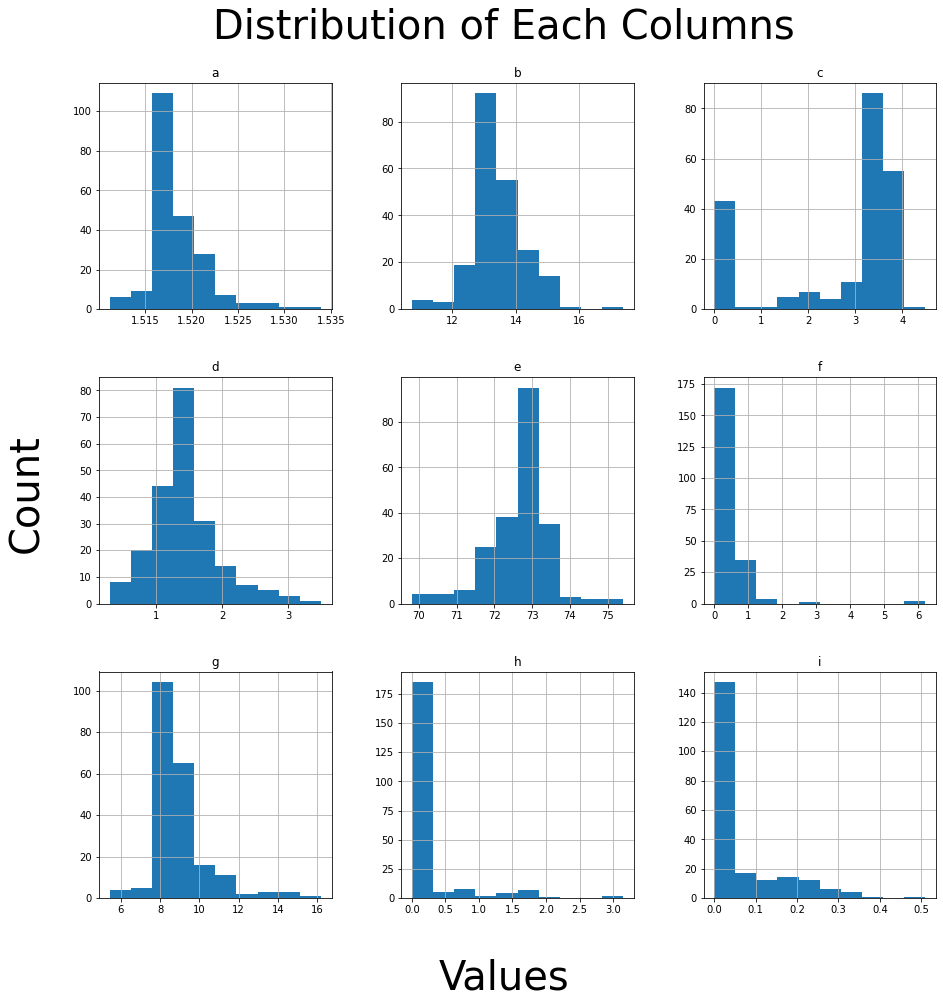

In [8]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.suptitle('Distribution of Each Columns', x=0.5, y=0.95, ha='center', fontsize=40)
fig.text(0.5, 0.04, 'Values', ha='center',fontsize=40)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=40)

## Summary
- All columns are normally distributed, except where f, h and i show right skewness
- c is not normally distributed as well

# Clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(df)
trials_no = 10
errors = []

for i in range(1,trials_no+1):
    kmeans = KMeans(n_clusters=i, random_state=20).fit(df)
    errors.append(kmeans.inertia_)

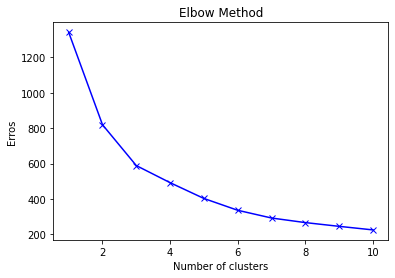

In [20]:
plt.plot(range(1,trials_no+1),errors,'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Erros')
plt.show()

In [22]:
# Using elbow method, number of clusters are chosen as 4

kmeans = KMeans(n_clusters=4, random_state=20).fit(df)
predictions = kmeans.predict(df)
predictions

array([1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       3, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1,
       1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [23]:
df['predition_kmean'] = predictions
df

,a,b,c,d,e,f,g,h,i,predition_kmean
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,3
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,1
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,1
